## 陽的オイラー法・陰的オイラー法・四次Runge-Kutta法の比較
dz(t)/dt = f(z(t))  
を数値的に解く。  

今回は f(z(t)) = z - z^3  とする。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [2]:
def function(z):
    return z-z**3

def Newton_Solve(func, deriv_func):
    x = 10
    epsilon = 1e-5
    while func(x) > epsilon or -func(x) > epsilon:
        x -= func(x)/(deriv_func(x)+1e-7)
    return x

def right_answer(x_0, y_0, h=0.01):
    x = x_0
    y = y_0
    C = 1/y_0**2 - 1
    x_arr = [x_0]
    y_arr = [y_0]
    for i in range(0,400):
        x = x_0+(1+i)*h
        y = 1./((1.+C*np.exp(-2*x))**0.5)
        x_arr.append(x)
        y_arr.append(y)
    return x_arr, y_arr

def explicit_euler(x_0, y_0, h=0.01):
    x = x_0
    y = y_0
    x_arr = [x_0]
    y_arr = [y_0]
    for i in range(0,400):
        x = x_0+(1+i)*h
        y += h*function(y)
        x_arr.append(x)
        y_arr.append(y)
    return x_arr, y_arr

def implicit_euler(x_0, y_0, h=0.01):
    x = x_0
    y = y_0
    x_arr = [x_0]
    y_arr = [y_0]
    for i in range(0,400):
        x = x_0+(1+i)*h
        func = lambda t: t**3+(-1+1/h)*t-y/h
        deriv_func = lambda t: 3*t**2+(-1+1/h)
        y = Newton_Solve(func, deriv_func)
        x_arr.append(x)
        y_arr.append(y)
    return x_arr, y_arr

def runge_kutta(x_0, y_0, h=0.01):
    x = x_0
    y = y_0
    x_arr = [x_0]
    y_arr = [y_0]
    for i in range(0,400):
        x = x_0+(1+i)*h
        k1 = function(y)
        k2 = function(y+h*k1/2)
        k3 = function(y+h*k2/2)
        k4 = function(y+h*k3)
        y += h*(k1/6+k2/3+k3/3+k4/6)
        x_arr.append(x)
        y_arr.append(y)
    return x_arr, y_arr
    

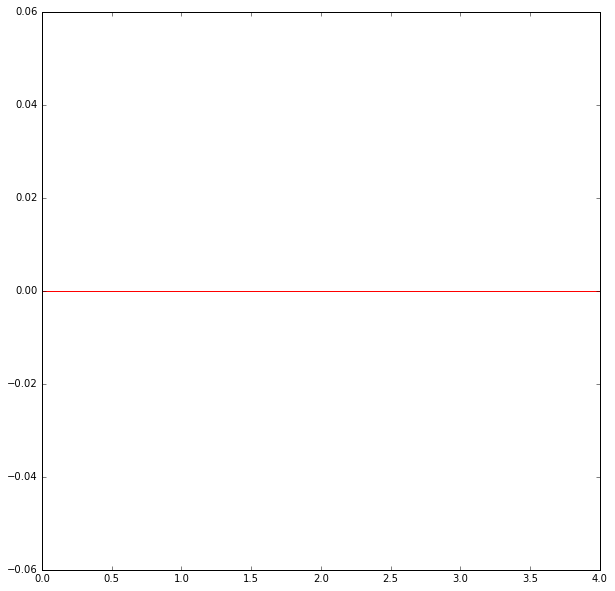

In [5]:
h = 0.01
x_0, y_0 = 0., 0
x_right, y_right = explicit_euler(x_0, y_0, h)
x_exp_euler, y_exp_euler = explicit_euler(x_0, y_0, h)
x_imp_euler, y_imp_euler = implicit_euler(x_0, y_0, h)
x_rk, y_rk = runge_kutta(x_0, y_0, h)
pylab.figure(figsize=(10, 10),dpi=20)
plt.plot(x_right, y_right)
plt.plot(x_exp_euler, y_exp_euler)
#plt.plot(x_imp_euler, y_imp_euler)
plt.plot(x_rk, y_rk)

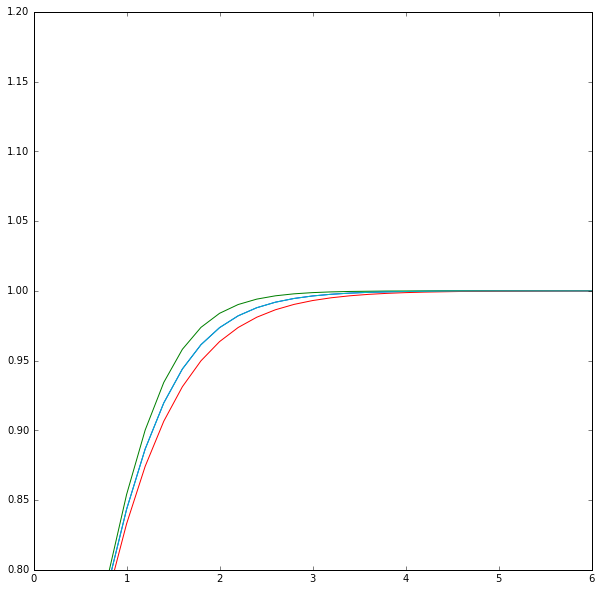

In [6]:
h=0.2
x_0, y_0 = 0., 0.5
x_right, y_right = right_answer(x_0, y_0, h)
x_exp_euler,y_exp_euler = explicit_euler(x_0, y_0, h)
x_imp_euler, y_imp_euler = implicit_euler(x_0, y_0, h)
x_rk, y_rk = runge_kutta(x_0, y_0, h)

pylab.figure(figsize=(10, 10),dpi=20)
plt.ylim(0.8, 1.2)
plt.xlim(0,6)
plt.plot(x_right,y_right)
plt.plot(x_exp_euler, y_exp_euler)
plt.plot(x_imp_euler, y_imp_euler)
plt.plot(x_rk, y_rk)

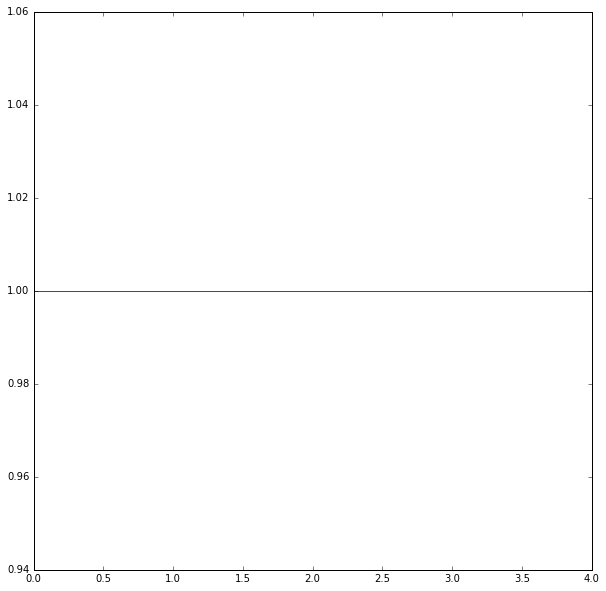

In [7]:
x_0, y_0 = 0., 1
x_right, y_right = explicit_euler(x_0, y_0)
x_exp_euler, y_exp_euler = explicit_euler(x_0, y_0)
x_rk, y_rk = runge_kutta(x_0, y_0)

pylab.figure(figsize=(10, 10),dpi=20)
plt.plot(x_right,y_right)
plt.plot(x_exp_euler, y_exp_euler)
plt.plot(x_rk, y_rk)

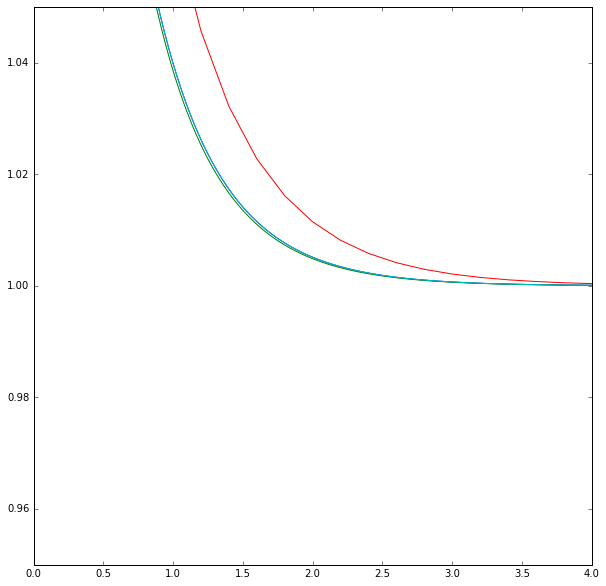

In [8]:
h = 0.2
x_0, y_0 = 0., 1.5
x_right, y_right = right_answer(x_0, y_0)
x_exp_euler,y_exp_euler = explicit_euler(x_0, y_0)
x_imp_euler, y_imp_euler = implicit_euler(x_0, y_0, h)
x_rk, y_rk = runge_kutta(x_0, y_0)

pylab.figure(figsize=(10, 10),dpi=20)
plt.ylim(0.95, 1.05)
plt.xlim(0,4)
plt.plot(x_right,y_right)
plt.plot(x_exp_euler, y_exp_euler)
plt.plot(x_imp_euler, y_imp_euler)
plt.plot(x_rk, y_rk)